Подключаем библиотеки

In [1]:
import gudhi as gd
import csv
import matplotlib.pyplot as plt

Импортируем данные в формате csv

In [2]:
with open('./data.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

Делаем данные непрерывными:

In [3]:
data = data[1:]
my_points = []
for x in data:
    my_points.append(list(map(float, x[1:6])))

Создаем альфа-комплекс, ограничившись 20 точками (иначе все плохо):

In [4]:
ac = gd.AlphaComplex(points = my_points[:5])
st = ac.create_simplex_tree()

Информация об альфа-фильтрации:

In [5]:
result_str = 'Alpha complex is of dimension ' + repr(st.dimension()) + ' - ' + \
    repr(st.num_simplices()) + ' simplices - ' + \
    repr(st.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in st.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 5 - 475 simplices - 10 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[5, 7] -> 892096935996.86
[2, 4] -> 1929195706620.45
[4, 9] -> 10227046993417.81
[2, 5] -> 10769236756935.75
[1, 9] -> 19693023198319.71
[0, 8] -> 32391421217525.07
[1, 8] -> 39831424466631.02
[1, 4] -> 100751435376350.95
[1, 4, 9] -> 100751435376350.95
[2, 7] -> 122219695898036.41
[2, 5, 7] -> 122219695898036.41
[0, 1] -> 203621564706622.69
[0, 1, 8] -> 203621564706622.69
[1, 2] -> 220046699616259.25
[1, 2, 4] -> 220046699616259.25
[0, 9] -> 221698681594944.81
[0, 1, 9] -> 221698681594944.81
[1, 5] -> 452475719775555.19
[1, 2, 5] -> 452475719775555.19
[3, 6] -> 627461580263397.00
[0, 3] -> 3294133468770253.00
[3, 8] -> 10157585859780712.00
[0, 3, 8] -> 10157585859780712.00
[4, 7] -> 37858721053863016.00
[2, 4, 7] -> 37858721053863016.00
[6, 8] -> 124760855921949920.00
[3, 6, 8] -> 124760855921949920.00
[0

Числа получились большие. Найдем среднее значение фильтраций:

In [78]:
avg = 0
simplices = list(st.get_simplices())

for simplex in simplices:
    avg += st.filtration(simplex[0])
    # print(avg)
avg /= len(simplices)
print(avg)

6.09498165661767e+25


Теперь нормализуем значения фильтрации (в смысле gudhi), разделив на div

In [79]:
div = avg
for simplex in list(st.get_simplices()):
    st.assign_filtration(simplex[0], st.filtration(simplex[0]) / div)

Снова посмотрим на альфа-комплекс:

In [80]:
result_str = 'Alpha complex is of dimension ' + repr(st.dimension()) + ' - ' + \
    repr(st.num_simplices()) + ' simplices - ' + \
    repr(st.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in st.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 5 - 30575 simplices - 80 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0

Значения стали приятнее. 

Строим диаграмму устойчивости:

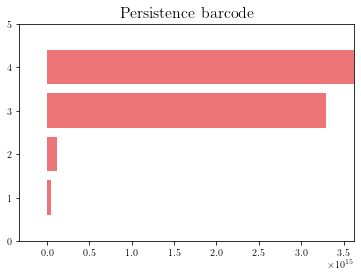

In [5]:
diag = st.persistence(min_persistence = 0.)
gd.plot_persistence_barcode(diag)
plt.rc('figure', figsize=(14, 7))  # 10, 5 is default parameters
plt.show()

Попробуем построить и получить информацию о комплексе Вьетора–Рипса (все как раньше), ограничившись 20 точчками:

In [15]:
rips_complex = gd.RipsComplex(points = my_points[:5])
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 4)

In [ ]:
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Диаграмма устойчивости

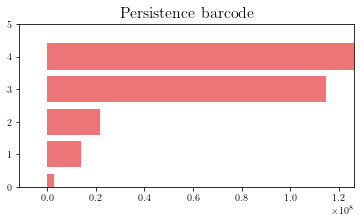

In [23]:
diag = simplex_tree.persistence(min_persistence = 0.00000005)
gd.plot_persistence_barcode(diag)
plt.rc('figure', figsize=(6, 3))
plt.show()

In [ ]:
В принципе, про мои эксперименты с разбросом можно написать в качестве результата проекта :)